In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
# Read data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sub_df = pd.read_csv('gender_submission.csv') # a set of predictions that assume all and only female passengers survive
                                              # as an example of what a submission file should look like

In [3]:
# Show data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Data size
print("Train Data Size: ", train_df.shape)
print("Test Data Size:  ", test_df.shape)

Train Data Size:  (891, 12)
Test Data Size:   (418, 11)


In [6]:
# Show if any NAN data
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Exploratory Data Analysis (EDA)

Let's see the total number of passengers and number of passengers who survived

In [8]:
print('Total number of passengers in the training data =', len(train_df))
print('Number of passengers in the training data who survived =', len(train_df[train_df['Survived'] == 1]))

Total number of passengers in the training data = 891
Number of passengers in the training data who survived = 342


Let's see the number of **Children and Adults** who survived

In [9]:
print('Number of children who survived =', np.sum(train_df['Survived'][train_df['Age'] < 18]))
print('Number of adults who survived =', np.sum(train_df['Survived'][train_df['Age'] > 18]))

Number of children who survived = 61
Number of adults who survived = 220


Let's plot the number of **Male & Female** passengers who survived and didnt

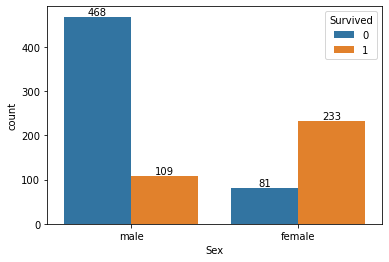

In [10]:
ax = sns.countplot(x='Sex', hue='Survived', data=train_df)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height() + 3),
            ha="center")
plt.show()  

Let's plot the number of passengers who survived and didnt based on **Ticket Class**

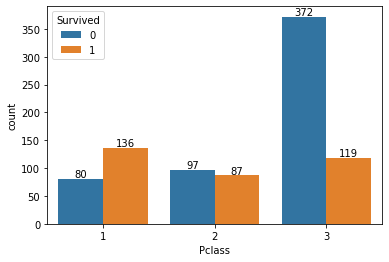

In [11]:
ax1 = sns.countplot(x='Pclass', hue='Survived', data=train_df)
for p in ax1.patches:
    ax1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height() + 3),
            ha="center")
plt.show()    

Let's see the density of passengers based on Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

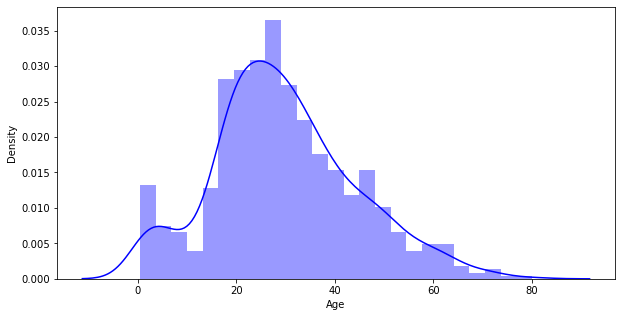

In [12]:
plt.figure(figsize=(10,5))
sns.distplot(train_df['Age'], bins=25, color='b')

Let's plot the number of passengers who survived and didnt based on **Siblings/Spouse** relationship

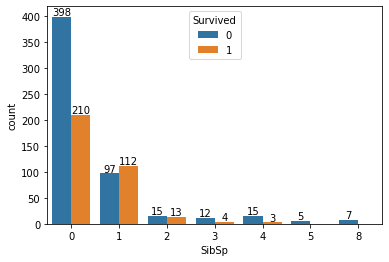

In [13]:
ax2 = sns.countplot(x='SibSp', hue='Survived', data=train_df)
for p in ax2.patches:
    ax2.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height() + 3),
            ha="center")
plt.show()    

Let's plot the number of passengers who survived and didnt based on **Parents/Children** relationship

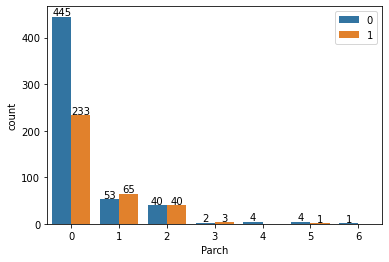

In [14]:
ax3 = sns.countplot(x='Parch', hue='Survived', data=train_df)
for p in ax3.patches:
    ax3.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height() + 3),
            ha="center")
plt.legend(loc='upper right')  
plt.show()    

# Pre-processing data

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**First**, we are going to change our categorical features: "Female" or "Male" by encoding this feature: "Female" = 0, "Male" = 1

In [16]:
train_df['Sex'] = train_df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
test_df['Sex'] = test_df['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [17]:
# Let's see the changes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [18]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


**Second**, missing values. We use the "fillna" function for better idea. The "fillna" function replaces every NaN (not a number) entry with the given input (the mean of the column)

In [19]:
train_df['Age'] = train_df['Age'].fillna(np.mean(train_df['Age']))
train_df['Fare'] = train_df['Fare'].fillna(np.mean(train_df['Fare']))
test_df['Age'] = test_df['Age'].fillna(np.mean(test_df['Age']))
test_df['Fare'] = test_df['Fare'].fillna(np.mean(test_df['Fare']))

In [20]:
# Let's see the changes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


**Third**, drop the unuse columns. ID columns are never relevant. As we build the simple model, we also drop the Cabin and Embarked columns because we thought it wasn't necessary

In [21]:
train_df = train_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
test_df = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

In [22]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


**Fourth**, X as a features (outside Survived column) and Y as a labels (the Survived column)

In [23]:
X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']

# Train the model

In [24]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X, y) 

SVC(gamma='auto')

After being fitted, the model can then be used to predict new values:

In [25]:
yhat = clf.predict(X)
yhat [0:5]

array([0, 1, 0, 1, 0], dtype=int64)

# Model Evaluation

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       549
           1       0.91      0.82      0.86       342

    accuracy                           0.90       891
   macro avg       0.90      0.88      0.89       891
weighted avg       0.90      0.90      0.90       891

Confusion matrix, without normalization
[[520  29]
 [ 63 279]]


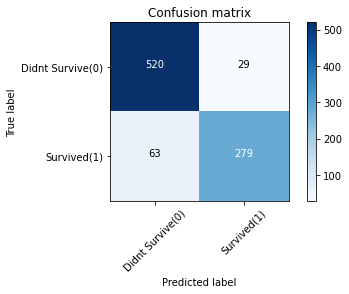

In [28]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y, yhat)) # digits=4

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Didnt Survive(0)','Survived(1)'],normalize= False,  title='Confusion matrix')

# Submitting

In [29]:
# Show the test data (after be pre-processing)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875


In [30]:
# Show the gender_submission.csv data (example submission)
sub_df.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [31]:
# Predicting
Preds = clf.predict(test_df)
Preds[0:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [32]:
# Input the result of predicting to new submission csv data
sub_df['Survived'] = Preds
sub_df.to_csv('submission.csv', index=False)
sub_df.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
5,897,0
6,898,1
7,899,1
8,900,0
9,901,1


In [33]:
# Input the result of predicting to new submission csv data (with complete features of test_df)
complete_df = pd.concat([sub_df, test_df], axis=1)
complete_df.to_csv('complete_submission.csv', index=False)
complete_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,0,3,1,34.5,0,0,7.8292
1,893,0,3,0,47.0,1,0,7.0000
2,894,1,2,1,62.0,0,0,9.6875
3,895,0,3,1,27.0,0,0,8.6625
4,896,0,3,0,22.0,1,1,12.2875
5,897,0,3,1,14.0,0,0,9.2250
6,898,1,3,0,30.0,0,0,7.6292
7,899,1,2,1,26.0,1,1,29.0000
8,900,0,3,0,18.0,0,0,7.2292
9,901,1,3,1,21.0,2,0,24.1500
